In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('/content/ds_practical4.csv')
df.head(2)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0


In [3]:
df.isnull().sum()

,0
company,0
job,0
degree,0
salary_more_then_100k,0


In [8]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']

In [9]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [10]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [24]:
display(inputs.head(2))

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1


In [25]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
display(inputs.head(2))

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1


In [26]:
display(target.head(2))

,salary_more_then_100k
0,0
1,0


In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

In [18]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.75


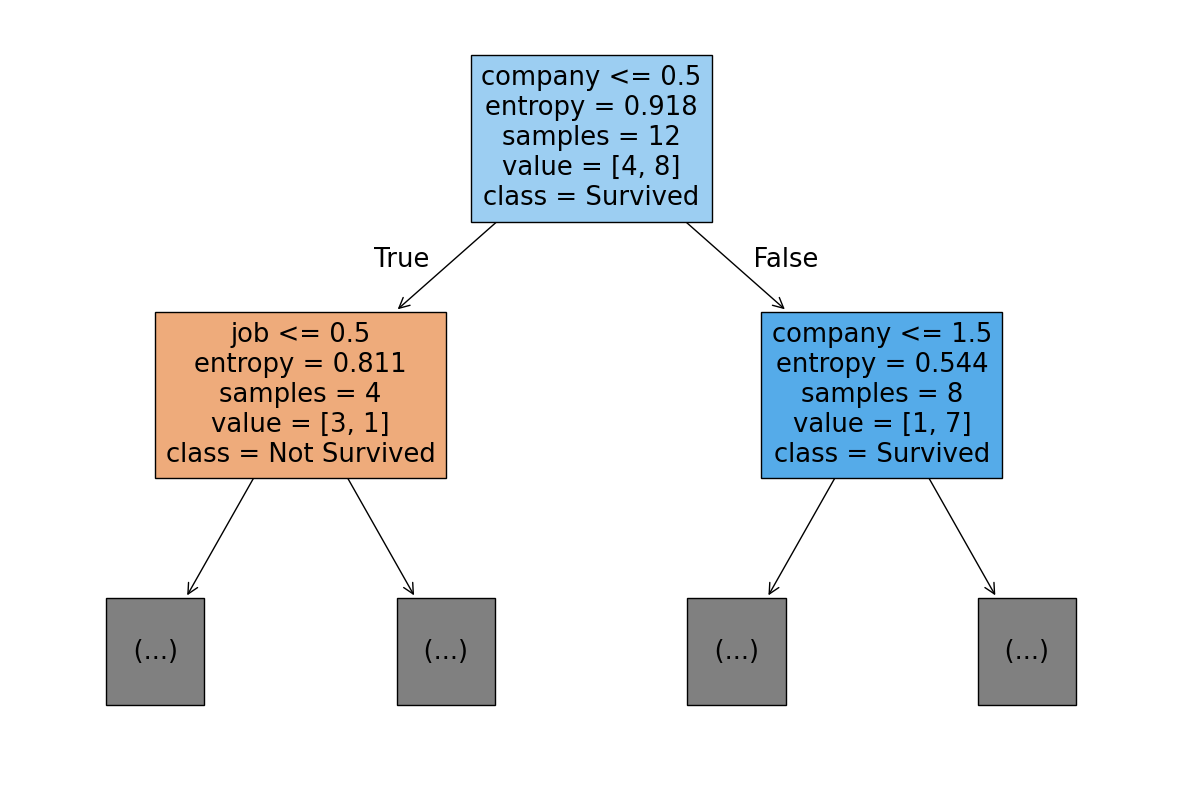

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(model,filled=True, feature_names=x.columns, class_names=['Not Survived', 'Survived'], max_depth=1)
plt.show()